## Waiter Tips Exploratory Data Analysis

### Data Preparation

In [1]:
# Import all libraries to be used

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import shapiro

In [2]:
# Load the dataset into a dataframe

tips=sns.load_dataset("tips")

In [3]:
# This function provides a general overview of the data

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Number of rows
Number of columns
Field names
Nulls: Are we dealing with missing data
Data Types: does anything need to be converted? 

In [4]:
# This function provides descriptive statistics on the numeric data

tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Data Cleaning

In [5]:
# This function shows total number of duplicate records

tips.duplicated().sum()

1

In [6]:
# This function shows the actual duplicate record

tips.loc[tips.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


Because there is no primary key we are uncertain if in fact it is a duplicate record therefore it will not be removed.

### Data Exploration

In [7]:
# Customize Visuals
sns.set(rc={'figure.figsize': (18,8)})
sns.set_style("whitegrid")
sns.set_context("talk", font_scale = 1.0)

In [8]:
# Created column 'tip percentage' into original dataframe
# Applied the round function on the created column

tips['tip_percentage'] = tips["tip"] / tips["total_bill"] * 100
tips['tip_percentage'] = tips['tip_percentage'].round(2)
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05


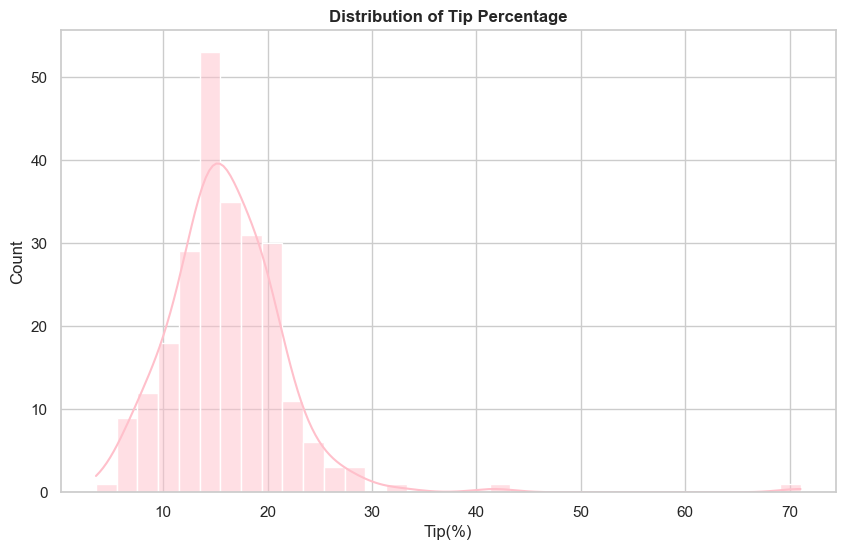

In [59]:
# Lets see the distribution of tips
plt.figure(figsize=(10, 6))

sns.histplot(data = tips, x= 'tip_percentage', kde = 'true', color = 'pink')

plt.title('Distribution of Tip Percentage', fontweight='bold')
plt.xlabel('Tip(%)')
plt.show()

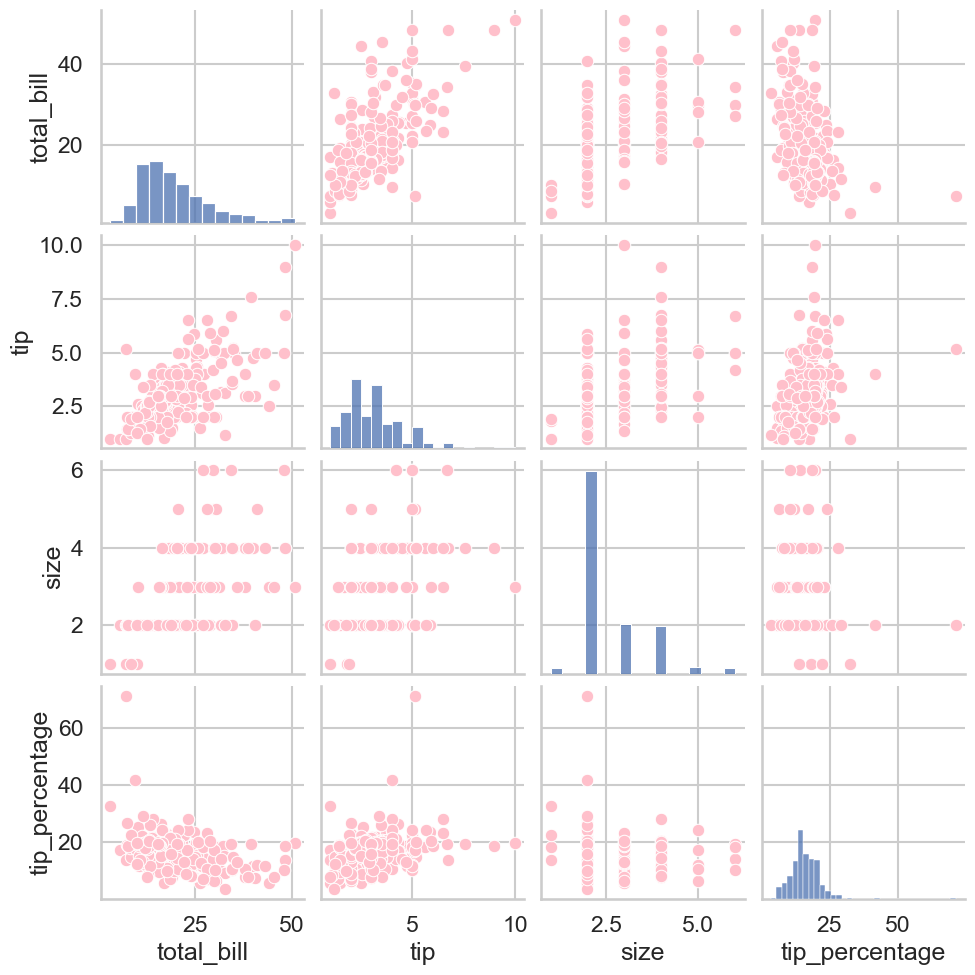

In [10]:
# In order to see the relationship between the different continuos variables
# we did a pairplot
sns.pairplot(data = tips, plot_kws = {"color": "pink"})

This dataset has few continuos variables, as expected there seems to be a positive relationship between total bill and tip amount. What is interesting is a slight negative relationship between total bill and tip pecentage, as bill amount increases tip percentage decreases.

### Data Analysis:
#### Research Question:
Is there a difference in tipping behavior by sex?

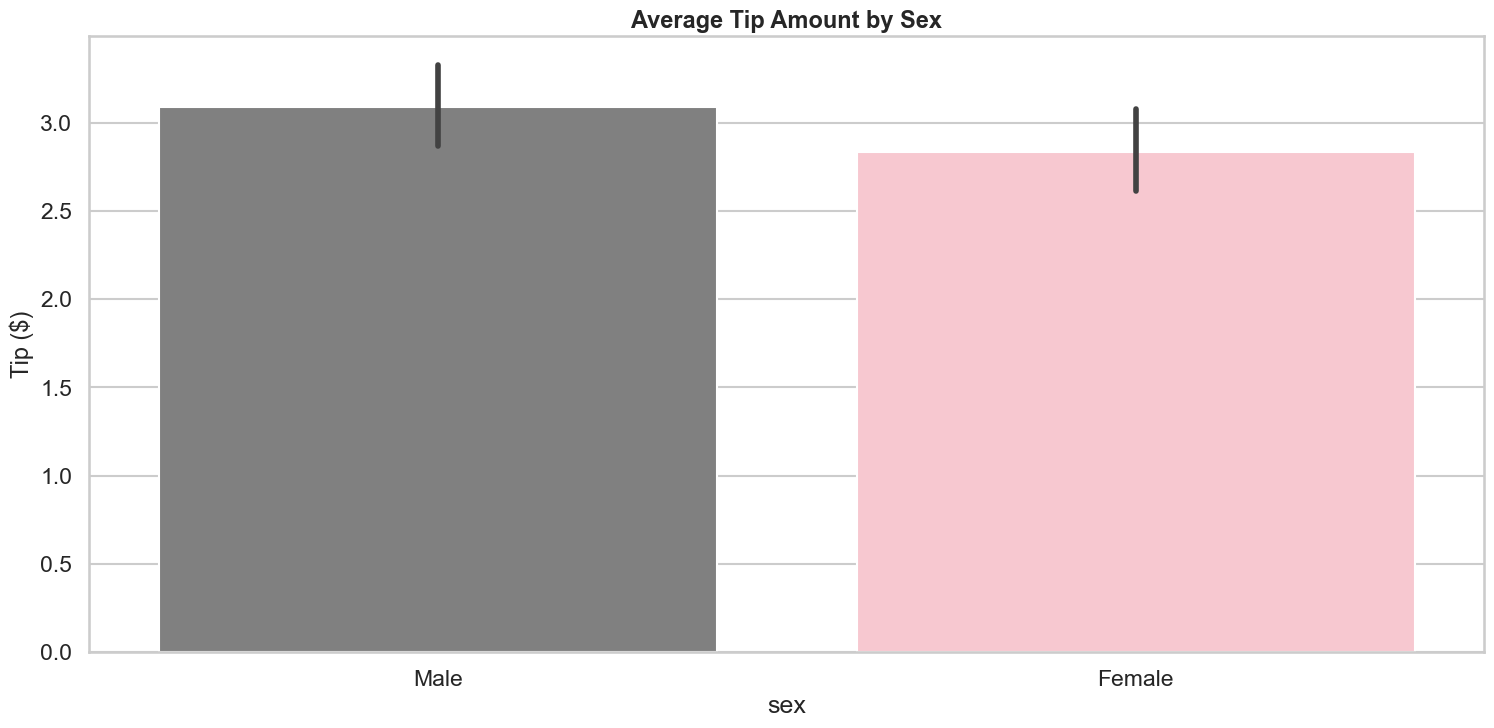

In [26]:
# A bar chart allows us to see how the average tip amount relates to sex
sns.barplot(data= tips, x= "sex", y= "tip", palette = ["gray", "pink"])

plt.title('Average Tip Amount by Sex', fontsize=17, fontweight='bold')
plt.ylabel('Tip ($)', fontsize=17)
plt.show()

When comparing total tip amount between male and female, on average males tip slightly more. 

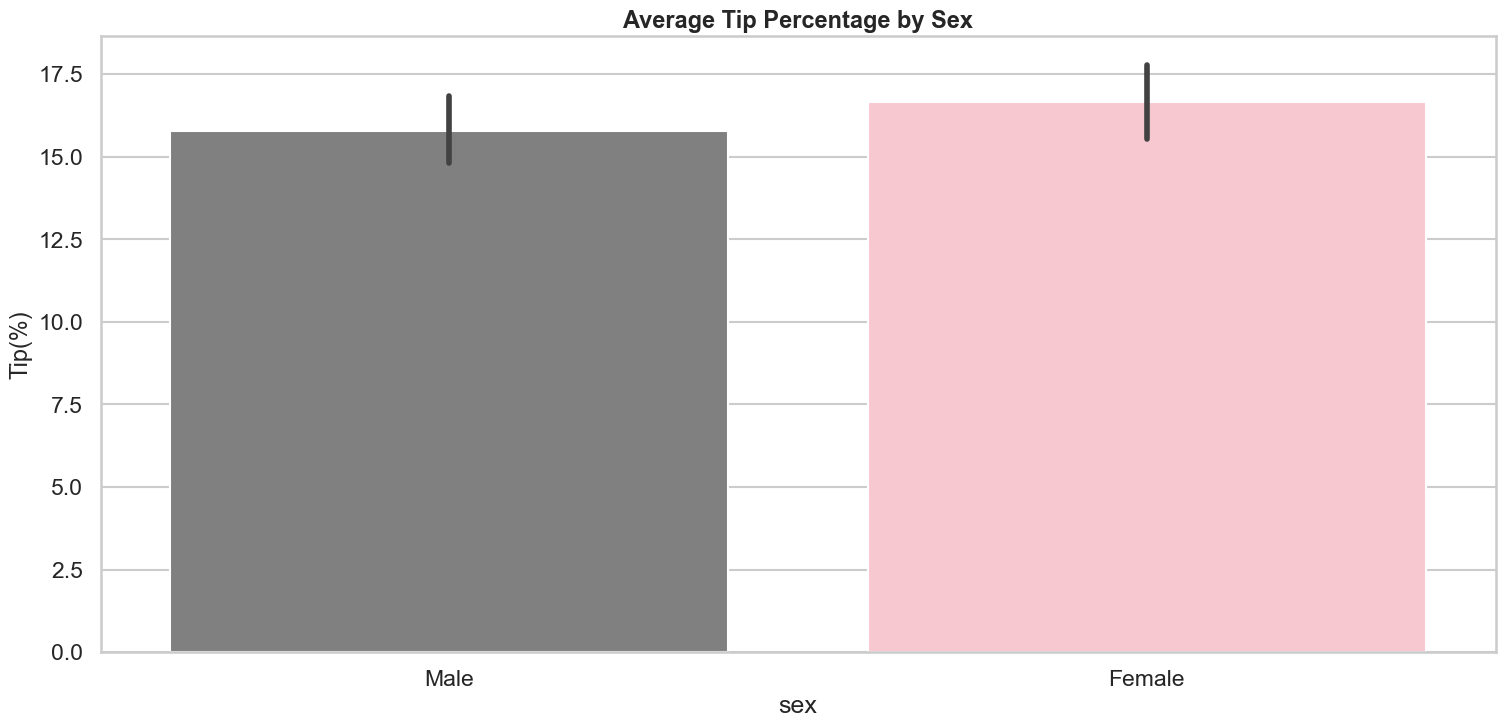

In [27]:
# This time the bar chart allows us to see how the average tip percentage relates to sex
sns.barplot(data = tips, x= "sex", y= "tip_percentage", palette = ["gray", "pink"])

plt.title('Average Tip Percentage by Sex', fontsize=17, fontweight='bold')
plt.ylabel('Tip(%)', fontsize=17)
plt.show()

When comparing tip percentage between male and female, on average female tip slightly more.

In [13]:
tip_count = tips['sex'].value_counts()
#tip_count1 = tip_count.reset_index()
tip_count
#tip_count.plot.pie(y='tip_count', figsize=(4, 8), autopct='%.1f%%')
#plt.pie(data= tip_count, labels= "sex", autopct='%1.1f%%');

Male      157
Female     87
Name: sex, dtype: int64

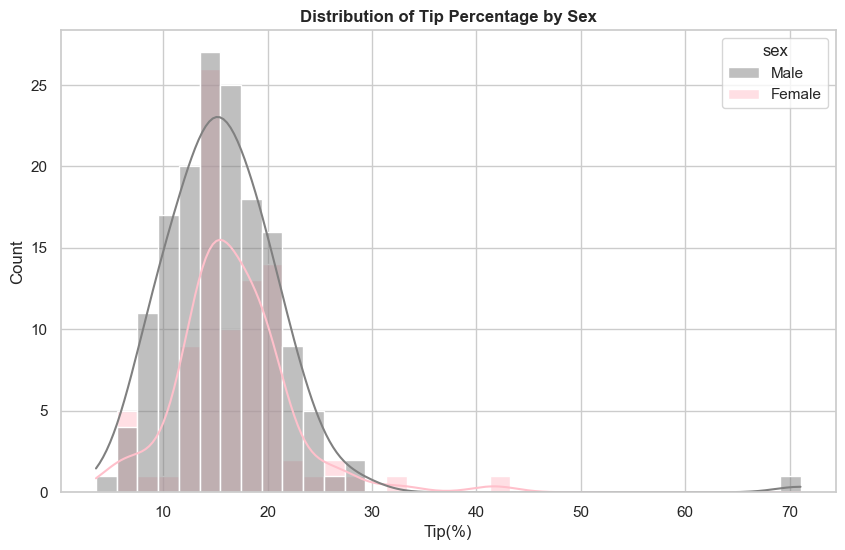

In [50]:
# Lets see the distribution of tip percentage by sex
plt.figure(figsize=(10, 6))

sns.histplot(data = tips, x = 'tip_percentage', kde = 'true', hue = 'sex', palette = ["gray", "pink"])

plt.title('Distribution of Tip Percentage by Sex', fontweight='bold')
plt.xlabel('Tip(%)')
plt.show()

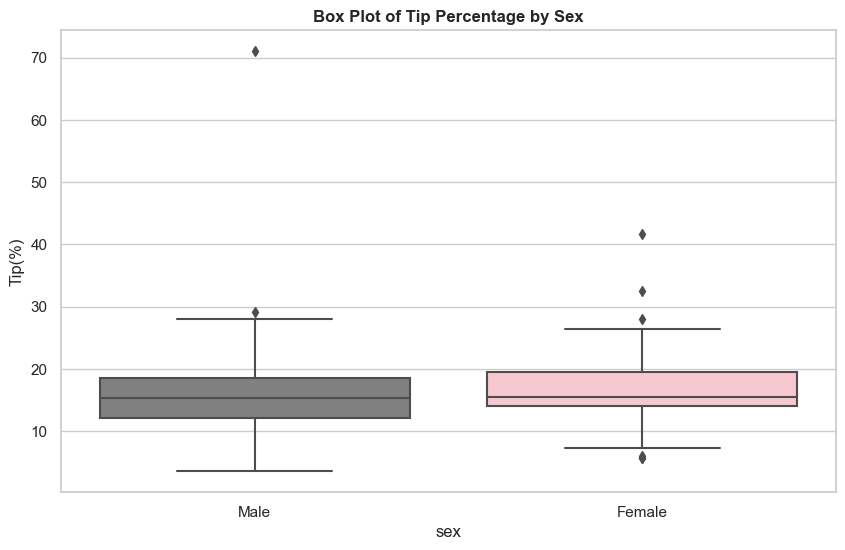

In [47]:
# lets compare the distribution by sex
plt.figure(figsize=(10, 6))

sns.boxplot(x='sex', y='tip_percentage', data = tips, palette=["gray", "pink"])

plt.title('Box Plot of Tip Percentage by Sex',fontweight='bold')
plt.ylabel('Tip(%)')
plt.show()


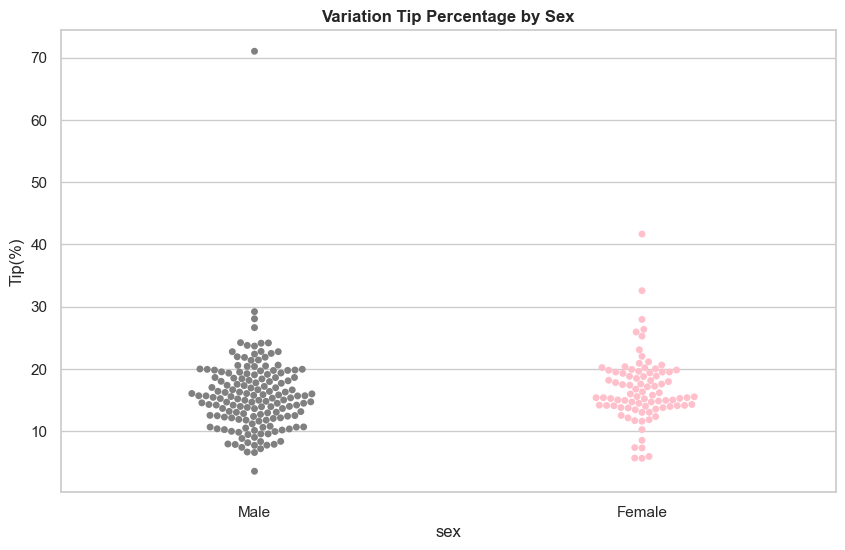

In [57]:
#The swarmplot shows the variation of tip percentage by sex
plt.figure(figsize=(10, 6))

sns.swarmplot(data= tips, x= "sex", y= "tip_percentage",  palette = ["gray", "pink"], size=5)

plt.title('Variation Tip Percentage by Sex', fontweight='bold')
plt.ylabel('Tip(%)')
plt.show()



The swarmplot shows the variation of tip percentage/amount by sex, we can conclude that ...

### Tip Percentage for Females

In [16]:
f_tips = tips[tips['sex'] == 'Female']
f_tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
11,35.26,5.00,Female,No,Sun,Dinner,4,14.18
14,14.83,3.02,Female,No,Sun,Dinner,2,20.36
16,10.33,1.67,Female,No,Sun,Dinner,3,16.17


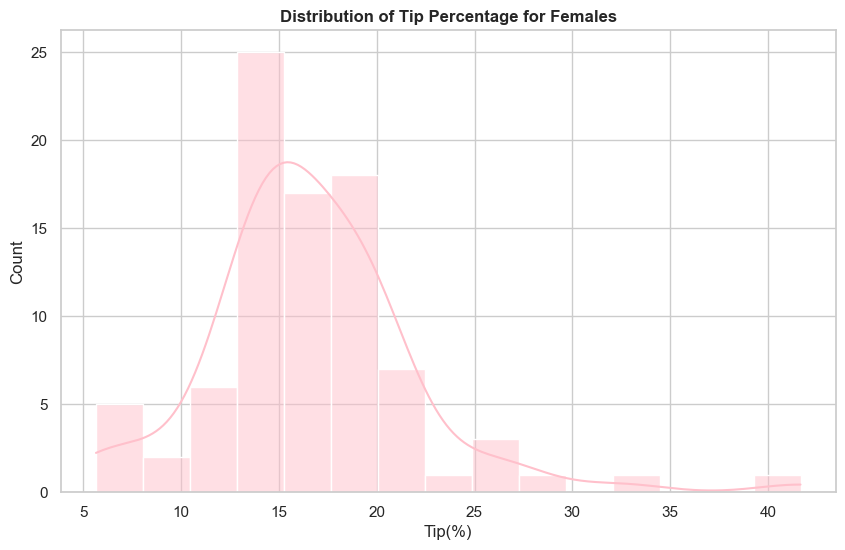

In [53]:
# Lets see the distribution of tip percentage for females
plt.figure(figsize=(10, 6))

sns.histplot(data = f_tips, x= 'tip_percentage', color='pink', kde = 'true')

plt.title('Distribution of Tip Percentage for Females', fontweight='bold')
plt.xlabel('Tip(%)')
plt.show()

#### Test for Normality

This is important to determine as many statistical tests require variables to be normally distributed in the population.

> Null hypothesis (H0): variable is normally distributed in some population.

> Alternative hypothesis (H1): variable is not normally distributed in some population.
   

In [19]:
#Test the distribution of female tip percentage for normality

stat, p = shapiro(f_tips['tip_percentage'])
print('Statistic = %.3f \np = %.3f' % (stat, p))

# Compare the p value to the significance threshold alpha. 

alpha = 0.05

if p > alpha:
    print("This looks normal (fail to reject H0)")
else:
    print("This is not normal (reject H0)")

Statistic = 0.898 
p = 0.000
This is not normal (reject H0)


##### Results for Normality:
We reject the null hypothesis and conclude that avg tip percentage is probably not normally distributed in the population.

In order to estimate if there is an avg tip percentage difference between two groups that are not normally distributed we will need to perform a nonparametric statistical test

### Tip Percentage for Males

In [20]:
#Created a new data frame 
m_tips = tips[tips['sex']== 'Male']
m_tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81


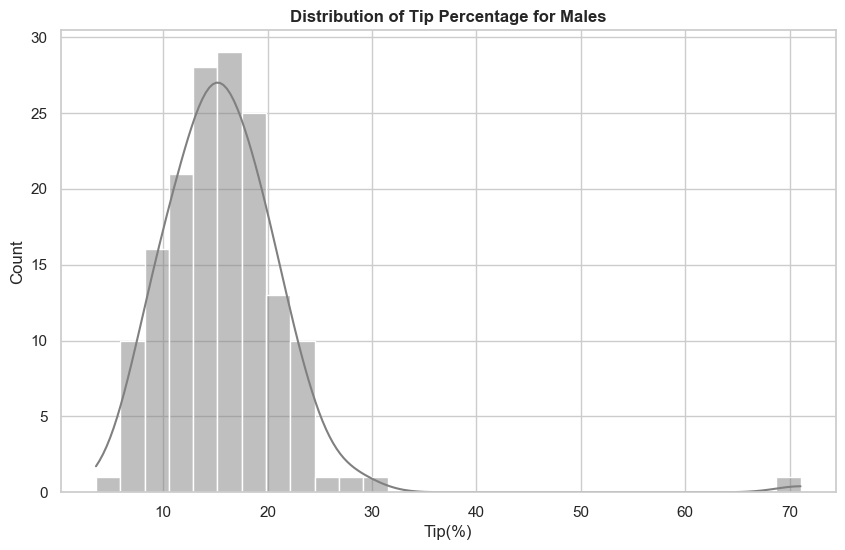

In [52]:
# Lets see the distribution of tip percentage for males
plt.figure(figsize=(10, 6))

sns.histplot(data = m_tips, x= 'tip_percentage', color='gray', kde = 'true')

plt.title('Distribution of Tip Percentage for Males', fontweight='bold')
plt.xlabel('Tip(%)')
plt.show()

This frequency distribution looks somewhat (but not exactly) normal. However, sample outcomes usually differ from their population counterparts.

The question is: how likely is the observed distribution if the avg tip percentage is normally distributed in the entire population?

The Shapiro-Wilk test will answer that.

#### Test for Normality

This is important to determine as many statistical tests require variables to be normally distributed in the population.

>Null hypothesis (H0): variable is normally distributed in some population.

>Alternative hypothesis (H1): variable is not normally distributed in some population.

In [23]:
# Test the distribution of male tip percentage for normality

stat, p = shapiro(m_tips['tip_percentage'])
print('Statistic = %.3f \np = %.3f' % (stat, p))

# Compare the p value to the significance threshold alpha. 

alpha = 0.05

if p > alpha:
    print("This looks normal (fail to reject H0)")
else:
    print("This is not normal (reject H0)")

Statistic = 0.745 
p = 0.000
This is not normal (reject H0)


##### Results for Normality:
We reject the null hypothesis and conclude that avg tip percentage is probably not normally distributed in the population.



### Hypothesis:


>Null hypothesis (H0): There is no difference in tipping behavior by sex
    
>Alternative hypothesis (H1): There is a difference in tipping behavior by sex

### Hypothesis Testing:

In order to estimate if there is a statistically significant difference between two groups that are not normally distributed we will need to perform a nonparametric statistical test

In [24]:
# conduct the Wilcoxon‐Mann‐Whitney Test
stat, p = ss.mannwhitneyu(f_tips['tip_percentage'], m_tips['tip_percentage'], alternative = "two-sided")
print('Statistic = %.3f \np = %.3f' % (stat, p))


Statistic = 7619.000 
p = 0.135


In [25]:
alpha = 0.05

if p > alpha:
    print("Fail to reject H0")
else:
    print("Reject H0")

Fail to reject H0


##### Results:
High p value means the result is not statistically significant, we fail to reject the null hypothesis, the test is inconsistent with the alternate hypothesis, it’s likely that the difference between males and females arose due to chance. 


#### Conclusion:
Conducted a Wilcoxon rank sum test to determine if there was a statistically significant difference in tipping behavior by sex. The test results indicated no statistically significant difference, despite observing that female tip percentage was on average, higher than male tip percentage.